In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ruta = "../data/noticias_test_ingeniero_IA.xlsx"
df = pd.read_excel(ruta)

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,titulo,bajada,cuerpo,nombre_medio,tipo_medio,fecha,seccion
0,Provincial Ovalle empata sin goles como local...,NaN,LUCIANO ALDAY VILLALOBOS Ovalle En la tarde de...,El Ovallino,0,2025-05-31,Deportes
1,Natalidad en caída y ciencia,NaN,La reciente cifra entregada por el INE (Instit...,La Estrella El Diario de Chiloé,0,2025-05-31,Actualidad
2,"Turismo de lujo en Chile: experiencias únicas,...","Un mercado que ha crecido de forma sostenida, ...",El turismo ha experimentado una transformación...,La Tercera,0,2025-05-31,NaN
3,Mon Laferte tenía razón,NaN,Señor Director: Luego del lamentable hallazgo ...,El Mercurio,0,2025-05-31,OPINIÓN - CARTAS
4,El niño cordillera,NaN,A siete décadas de su hallazgo –realizado por ...,El Mercurio|Vivienda y Decoración,7,2025-05-31,suplemento


In [4]:
print(df.columns)
print(df.dtypes)

Index(['titulo', 'bajada', 'cuerpo', 'nombre_medio', 'tipo_medio', 'fecha',
       'seccion'],
      dtype='object')
titulo                  object
bajada                  object
cuerpo                  object
nombre_medio            object
tipo_medio               int64
fecha           datetime64[ns]
seccion                 object
dtype: object


In [5]:
print(f"Dimensión: {df.shape}")
print("Nulos por columna:\n", df.isnull().sum())

Dimensión: (6399, 7)
Nulos por columna:
 titulo             0
bajada          2537
cuerpo             0
nombre_medio       0
tipo_medio         0
fecha              0
seccion         1053
dtype: int64


In [6]:
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
print(f"Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")

Rango de fechas: 2024-07-01 00:00:00 a 2025-05-31 00:00:00


In [7]:
df["texto"] = (df["titulo"].fillna('') + ". " +
               df["bajada"].fillna('') + ". " +
               df["cuerpo"].fillna(''))
df["largo_texto"] = df["texto"].apply(len)
df["largo_texto"].describe()

count     6399.000000
mean      3546.559306
std       3274.277847
min        135.000000
25%       1597.500000
50%       2812.000000
75%       4353.000000
max      33261.000000
Name: largo_texto, dtype: float64

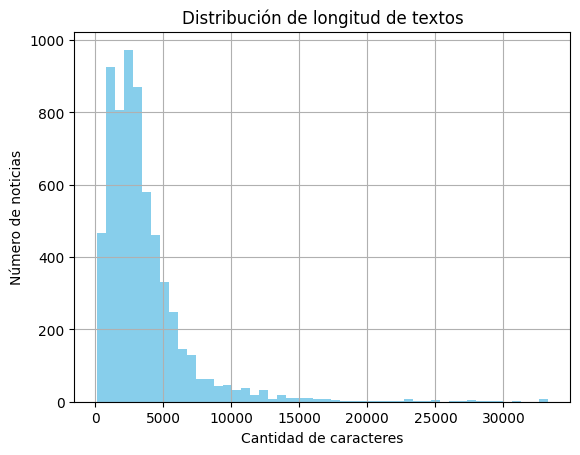

In [8]:
plt.hist(df["largo_texto"], bins=50, color='skyblue')
plt.title("Distribución de longitud de textos")
plt.xlabel("Cantidad de caracteres")
plt.ylabel("Número de noticias")
plt.grid(True)
plt.show()

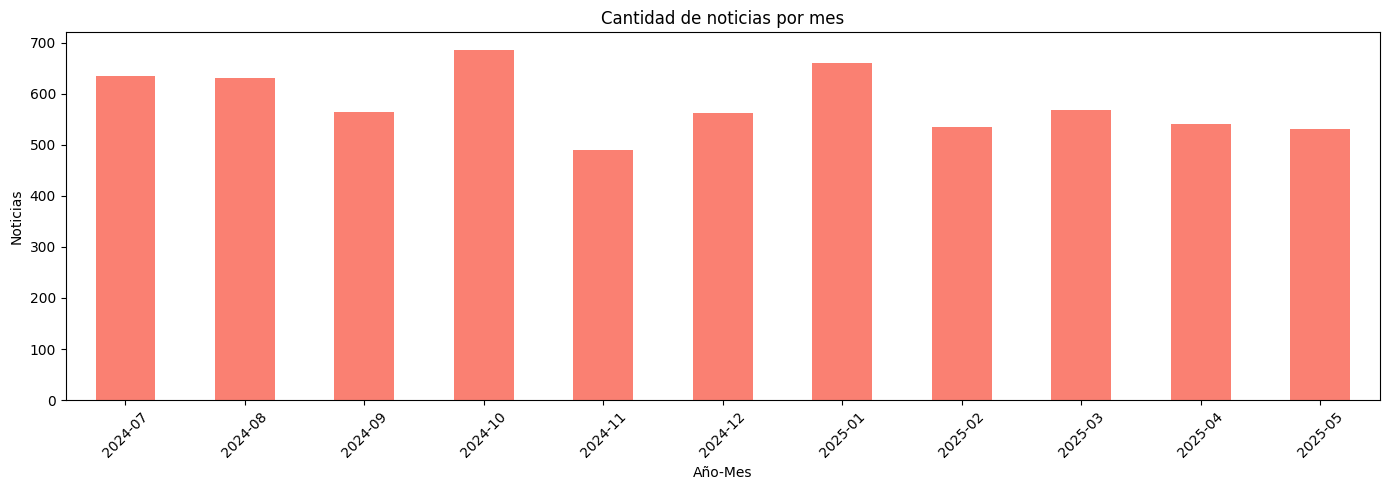

In [9]:
df["anio_mes"] = df["fecha"].dt.to_period("M")
conteo_mensual = df.groupby("anio_mes").size()

conteo_mensual.plot(kind="bar", figsize=(14,5), color='salmon')
plt.title("Cantidad de noticias por mes")
plt.ylabel("Noticias")
plt.xlabel("Año-Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
print("Duplicados:", df.duplicated(subset="texto").sum())
print("Vacíos (texto):", df["texto"].eq('').sum())

Duplicados: 661
Vacíos (texto): 0


In [11]:
df_limpio = df[~df["texto"].eq("")].drop_duplicates(subset="texto")

df_limpio.to_csv("../data/noticias_limpias.csv", index=False)
print(f"Noticias limpias guardadas: {len(df_limpio)}")

Noticias limpias guardadas: 5738
